<a href="https://colab.research.google.com/github/Utomi-Tom/Granular_Material_analysis/blob/main/Analogue_materials_Permea2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Information about Dataset

The dataset contains geotechnical measurements performed on selected mixtures of sand and gypsum. The aim of the tests was to determine suitable material with rheology similar to outcrop prototype which happens to be the interbedded Carbonate and marl  Malm formation. 

Types of Materials


1.   Gypsum
2.   Sand

1.   Flour

## Geotechnical tests

**What Is Geotechnical Analysis**

Geotechnical analysis is executed by geologists to determine informations regarding the petro-physical characteristics of soil and rock. These parameters in Engineering sector- are used to design foundations for planned structures, in geoscience they are used for reservoir characterisation, rheological characterisations and in analogue modelling for scaling purposes. Data are minned from rock samples collected from varying depth locations of interest and accessibility.

**what tests where performed on the sample and why?**


**what do i hope to achieve from this project**
1. Observe and visualize relationships existing between measured parameters.
2. Determine new features from existing parameters such as Slip and Dilation tendency.
3. Create a machine learning model- using sklearn library, that predicts a selected target property.








## Load data

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving Material_test.csv to Material_test.csv


{'Material_test.csv': b'\xef\xbb\xbfmaterial,\xcf\x83R [Pa],\xce\xa4M [Pa],\xcf\x83t [Pa],\xce\xa4C [Pa],\xcf\x83C [Pa],\xcf\x831  [Pa],\xcf\x832  [Pa],\xcf\x86e  [deg],\xcf\x86s  [deg],\xcf\x81r  [g/cm\xc2\xb3],FL\r\nGP 100,587,518,344,260,781,1344,250,40.7,34.2,0.665,1.72\r\nGP 100,586,508,191,271,815,1361,243,41.3,34.2,0.666,1.67\r\nGP 100,587,552,226,193,662,1484,281,41.8,37.3,0.659,2.24\r\nGP 100,1077,889,290,378,1212,2531,512,40.1,37.1,0.707,2.09\r\nGP 100,1077,1026,334,307,1127,2918,531,43,39.8,0.708,2.59\r\nGP 100,1083,1019,441,381,1319,2818,502,42.8,41.5,0.709,2.14\r\nGP 100,1567,1435,499,445,1588,4070,780,41.8,40.5,0.736,2.56\r\nGP 100,1574,1451,508,455,1630,4126,779,42.1,41.3,0.731,2.53\r\nGP75-SN25,597,545,240,203,689,1501,283,41.7,37.6,0.779,2.18\r\nGP75-SN25,599,501,81,224,718,1428,277,40.8,34.8,0.792,1.99\r\nGP75-SN25,1092,903,403,326,1054,2501,554,38.6,36.4,0.823,2.37\r\nGP75-SN25,1093,886,395,353,1123,2491,541,38.8,34.9,0.832,2.22\r\nGP75-SN25,1587,1243,318,445,1461,36

In [ ]:
!cp -r Material_test.csv  /content/drive/MyDrive/Analoguematerial_

In [ ]:
data = "/content/drive/MyDrive/Analoguematerial_/Material_test.csv"
dataset = pd.read_csv(data,)

In [ ]:
dataset.head()

,material,σR [Pa],ΤM [Pa],σt [Pa],ΤC [Pa],σC [Pa],σ1 [Pa],σ2 [Pa],φe [deg],φs [deg],ρr [g/cm³],FL
0,GP 100,587,518,344,260,781,1344,250,40.7,34.2,0.665,1.72
1,GP 100,586,508,191,271,815,1361,243,41.3,34.2,0.666,1.67
2,GP 100,587,552,226,193,662,1484,281,41.8,37.3,0.659,2.24
3,GP 100,1077,889,290,378,1212,2531,512,40.1,37.1,0.707,2.09
4,GP 100,1077,1026,334,307,1127,2918,531,43.0,39.8,0.708,2.59


## DATA QC AND QA

In [ ]:
# Rename the parameters with undersandable names.
Cols = ["Material","Normal_stress_Pa","Shear_stress_Pa","Tensile_stress_Pa", "Cohesion_Pa", "UCS_Pa", "Sigma1_Pa", "Sigma2_Pa", 
        "Effective_Angle_Friction", "React_Angle_Friction", "Density_g/cm³", "Flowability"]

Dataset = dataset.set_axis(Cols, axis="columns")
Dataset.head()

,Material,Normal_stress_Pa,Shear_stress_Pa,Tensile_stress_Pa,Cohesion_Pa,UCS_Pa,Sigma1_Pa,Sigma2_Pa,Effective_Angle_Friction,React_Angle_Friction,Density_g/cm³,Flowability
0,GP 100,587,518,344,260,781,1344,250,40.7,34.2,0.665,1.72
1,GP 100,586,508,191,271,815,1361,243,41.3,34.2,0.666,1.67
2,GP 100,587,552,226,193,662,1484,281,41.8,37.3,0.659,2.24
3,GP 100,1077,889,290,378,1212,2531,512,40.1,37.1,0.707,2.09
4,GP 100,1077,1026,334,307,1127,2918,531,43.0,39.8,0.708,2.59


In [ ]:
# Check for missing values
Dataset.isna().sum()

Material                    0
Normal_stress_Pa            0
Shear_stress_Pa             0
Tensile_stress_Pa           0
Cohesion_Pa                 0
UCS_Pa                      0
Sigma1_Pa                   0
Sigma2_Pa                   0
Effective_Angle_Friction    0
React_Angle_Friction        0
Density_g/cm³               0
Flowability                 0
dtype: int64

## EXPLORATORY DATA ANALYSIS

In [ ]:
## General describption of data
Dataset.describe()

,Normal_stress_Pa,Shear_stress_Pa,Tensile_stress_Pa,Cohesion_Pa,UCS_Pa,Sigma1_Pa,Sigma2_Pa,Effective_Angle_Friction,React_Angle_Friction,Density_g/cm³,Flowability
count,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1093.485714,888.40000,293.828571,323.200000,1049.028571,2557.371429,551.857143,39.180000,34.311429,0.826714,2.515429
std,396.510839,322.32594,157.231842,118.677219,374.890218,952.573359,221.382839,2.059954,4.965574,0.203050,0.811619
min,579.000000,409.00000,4.000000,139.000000,449.000000,1226.000000,243.000000,35.500000,20.800000,0.550000,1.670000
25%,624.000000,537.00000,164.500000,209.000000,703.500000,1499.000000,321.500000,37.700000,31.500000,0.662000,2.070000
50%,1092.000000,889.00000,293.000000,326.000000,1109.000000,2533.000000,541.000000,38.800000,35.000000,0.792000,2.290000
75%,1566.000000,1182.00000,420.000000,432.000000,1361.000000,3483.000000,770.500000,40.750000,37.700000,0.951500,2.590000
max,1620.000000,1451.00000,546.000000,550.000000,1727.000000,4126.000000,953.000000,43.000000,41.500000,1.187000,5.260000


In [ ]:
sns.set_theme(context="notebook",palette="husl")
col=Dataset.columns
print(col)

Index(['Material', 'Normal_stress_Pa', 'Shear_stress_Pa', 'Tensile_stress_Pa',
       'Cohesion_Pa', 'UCS_Pa', 'Sigma1_Pa', 'Sigma2_Pa',
       'Effective_Angle_Friction', 'React_Angle_Friction', 'Density_g/cm³',
       'Flowability'],
      dtype='object')


# Parameter relationships with increasing normal stress

In [ ]:
sns.set_theme(style="ticks")

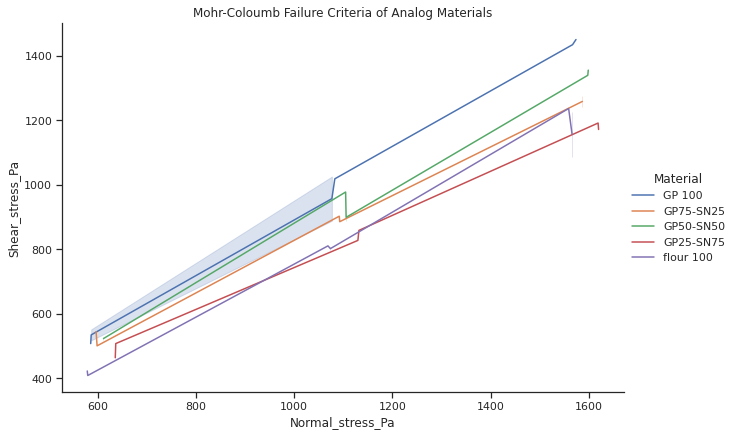

In [ ]:
sns.relplot(data=Dataset, x='Normal_stress_Pa', y='Shear_stress_Pa', hue='Material',height=6,aspect=1.5, kind="line")
plt.title("Mohr-Coloumb Failure Criteria of Analog Materials");

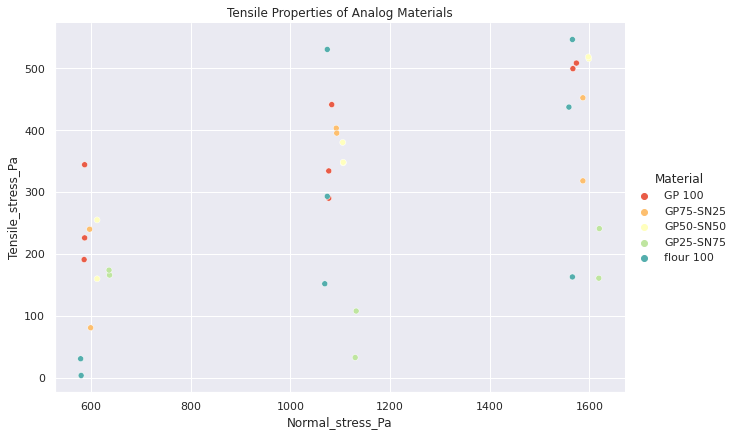

In [ ]:
sns.relplot(data=Dataset, x='Normal_stress_Pa', y='Tensile_stress_Pa', hue='Material',height=6,aspect=1.5,palette="Spectral")
plt.title("Tensile Properties of Analog Materials");

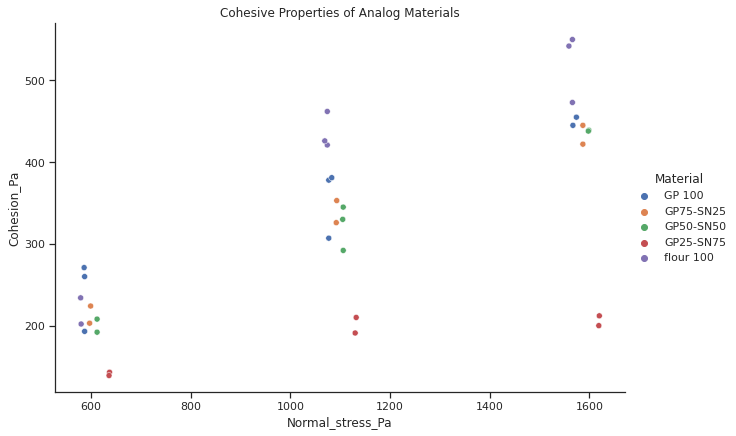

In [ ]:
sns.relplot(data=Dataset, x='Normal_stress_Pa', y='Cohesion_Pa', hue='Material',height=6,aspect=1.5)
plt.title("Cohesive Properties of Analog Materials");

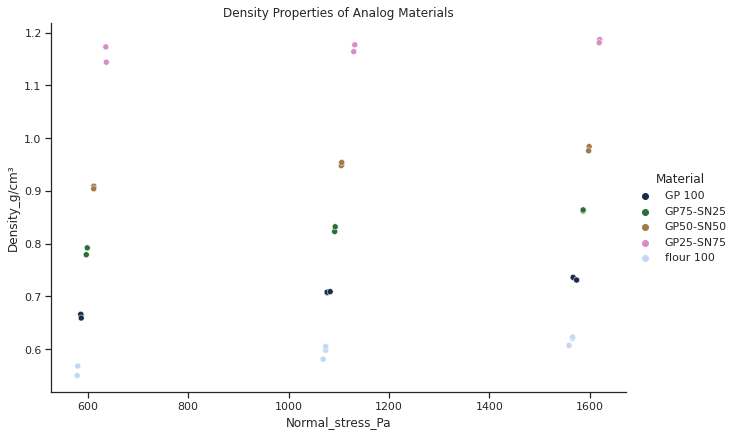

In [ ]:
sns.relplot(data=Dataset, x='Normal_stress_Pa', y='Density_g/cm³', hue='Material',height=6,aspect=1.5, palette="cubehelix")
plt.title("Density Properties of Analog Materials");

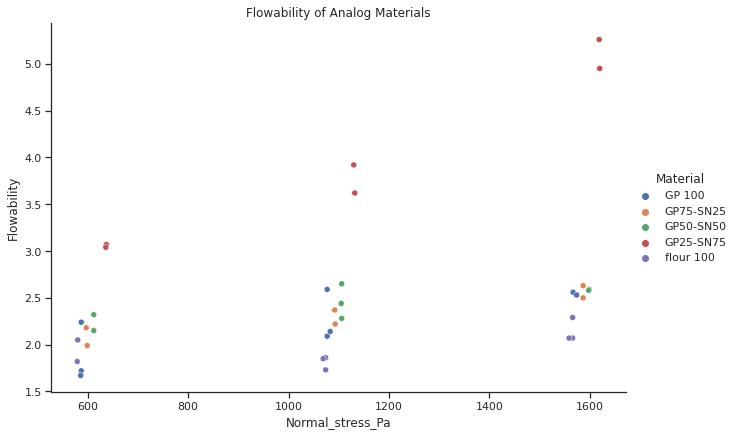

In [ ]:
sns.relplot(data=Dataset, x='Normal_stress_Pa', y='Flowability', hue='Material',height=6,aspect=1.5)
plt.title("Flowability of Analog Materials");

## Random parameter relationships

In [ ]:
col

Index(['Material', 'Normal_stress_Pa', 'Shear_stress_Pa', 'Tensile_stress_Pa',
       'Cohesion_Pa', 'UCS_Pa', 'Sigma1_Pa', 'Sigma2_Pa',
       'Effective_Angle_Friction', 'React_Angle_Friction', 'Density_g/cm³',
       'Flowability'],
      dtype='object')

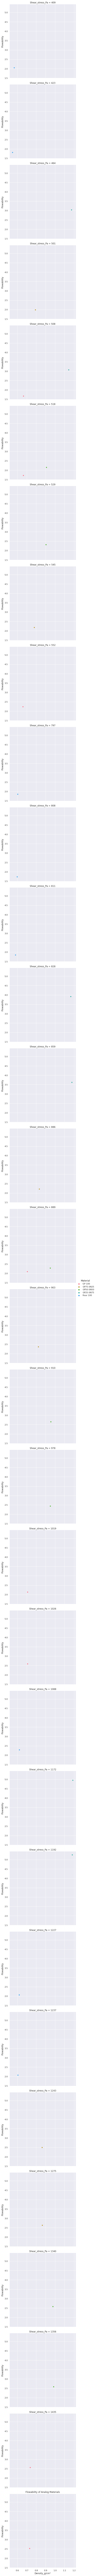

In [ ]:
sns.relplot(data=Dataset, x='Density_g/cm³', y='Flowability', hue='Material', height=6, row="Shear_stress_Pa")
plt.title("Flowability of Analog Materials");

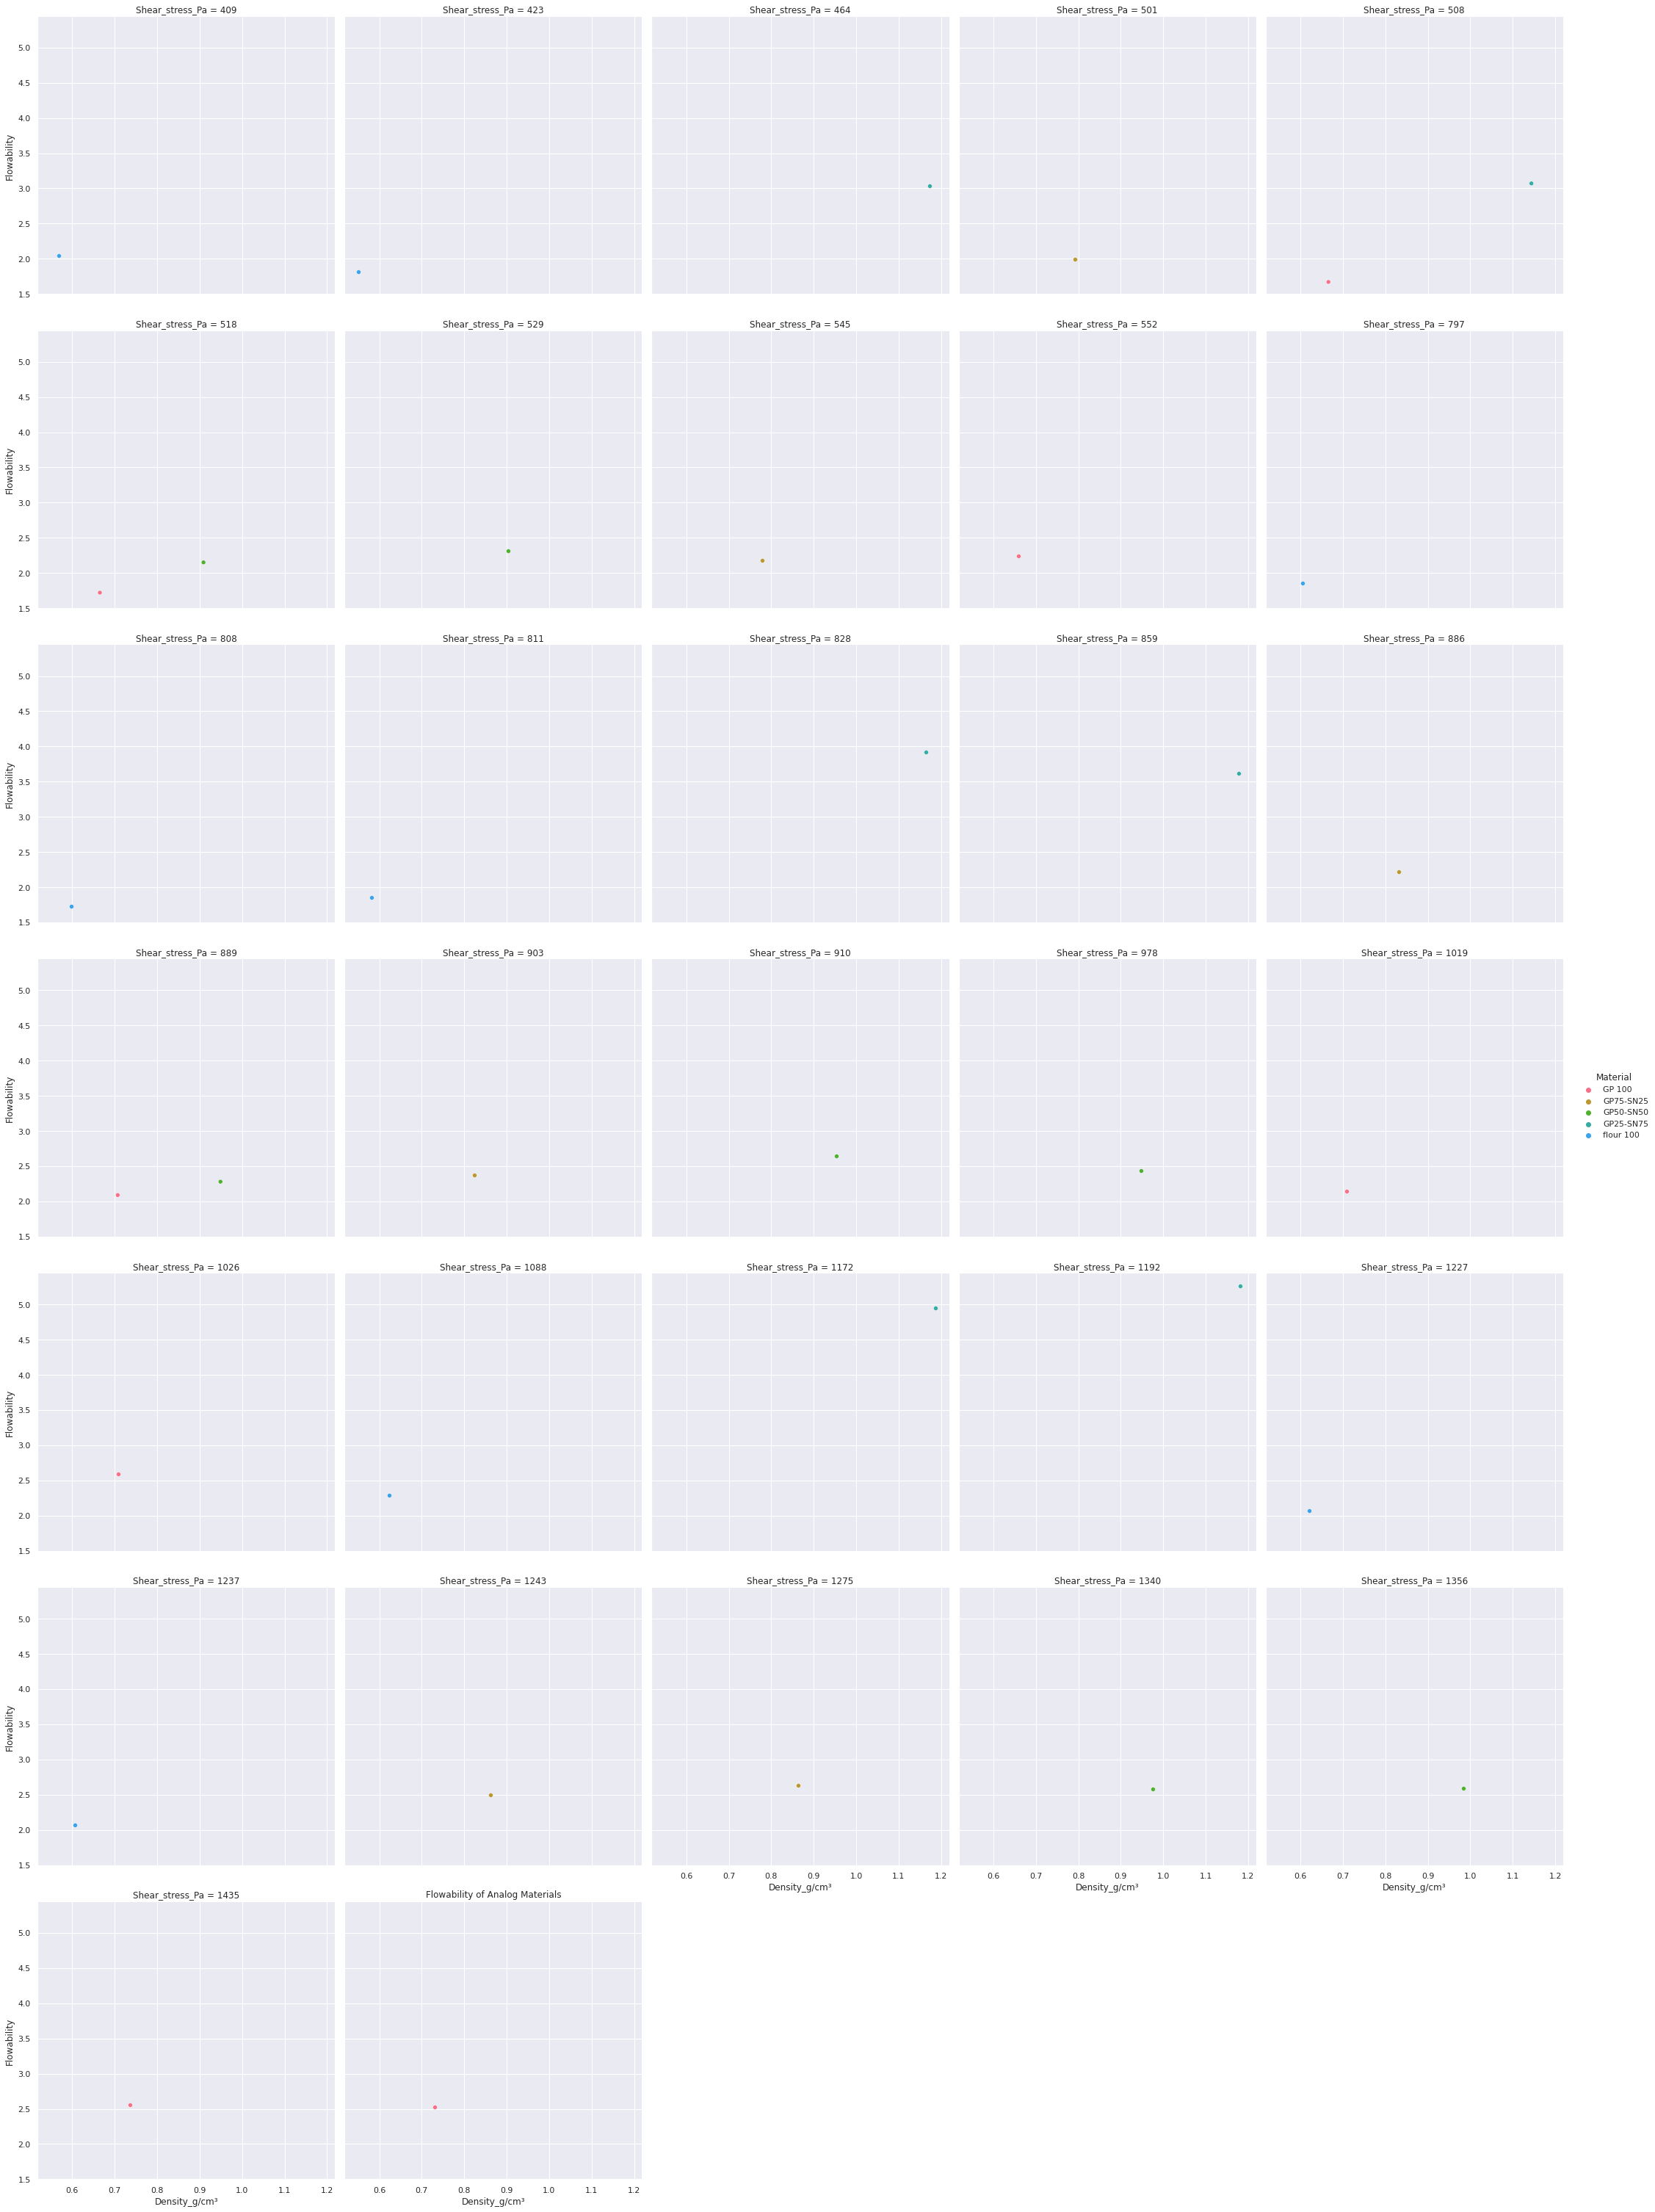

In [ ]:
# Wrapping the column relationships
sns.relplot(data=Dataset, x='Density_g/cm³', y='Flowability', hue='Material', height=6, col="Shear_stress_Pa", col_wrap=5)
plt.title("Flowability of Analog Materials");

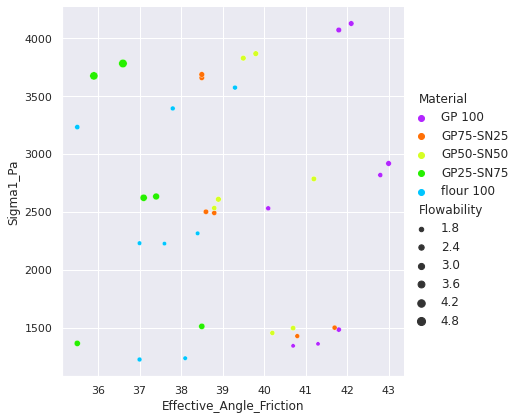

In [ ]:
sns.relplot(data=Dataset, x='Effective_Angle_Friction', y='Sigma1_Pa', hue='Material', height=6, 
            size="Flowability", palette="gist_ncar_r", aspect=1)

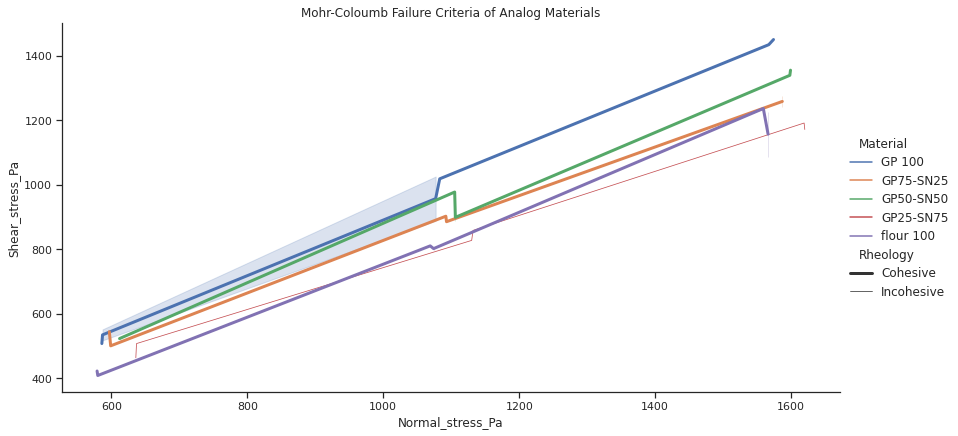

In [ ]:
sns.relplot(data=Dataset, x='Normal_stress_Pa', y='Shear_stress_Pa', hue='Material',height=6,aspect=2, kind="line", size="Rheology")
plt.title("Mohr-Coloumb Failure Criteria of Analog Materials");

In [ ]:
col


Index(['Material', 'Normal_stress_Pa', 'Shear_stress_Pa', 'Tensile_stress_Pa',
       'Cohesion_Pa', 'UCS_Pa', 'Sigma1_Pa', 'Sigma2_Pa',
       'Effective_Angle_Friction', 'React_Angle_Friction', 'Density_g/cm³',
       'Flowability'],
      dtype='object')

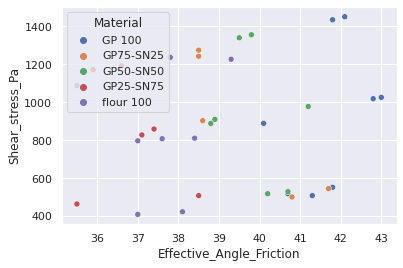

In [ ]:
sns.scatterplot(data=Dataset,x='Effective_Angle_Friction', y='Shear_stress_Pa', hue='Material',palette="deep" )

Text(0.5, 1.0, 'Distribution of internal angle of friction of granular materials')

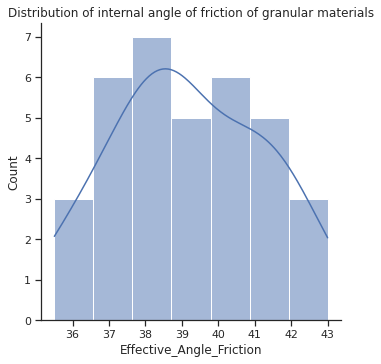

In [ ]:
sns.displot(data=Dataset, x='Effective_Angle_Friction', kde=True)
plt.title("Distribution of internal angle of friction of granular materials")

In [ ]:
k= Dataset.groupby(by='Material').count()
k.head()

,Normal_stress_Pa,Shear_stress_Pa,Tensile_stress_Pa,Cohesion_Pa,UCS_Pa,Sigma1_Pa,Sigma2_Pa,Effective_Angle_Friction,React_Angle_Friction,Density_g/cm³,Flowability
Material,,,,,,,,,,,
GP 100,8,8,8,8,8,8,8,8,8,8,8
GP25-SN75,6,6,6,6,6,6,6,6,6,6,6
GP50-SN50,7,7,7,7,7,7,7,7,7,7,7
GP75-SN25,6,6,6,6,6,6,6,6,6,6,6
flour 100,8,8,8,8,8,8,8,8,8,8,8


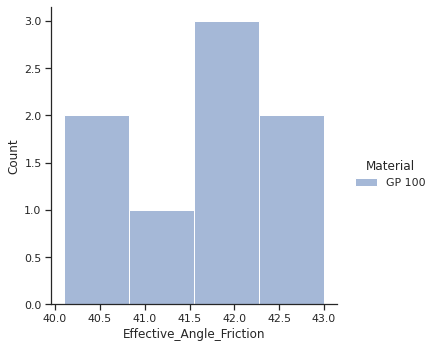

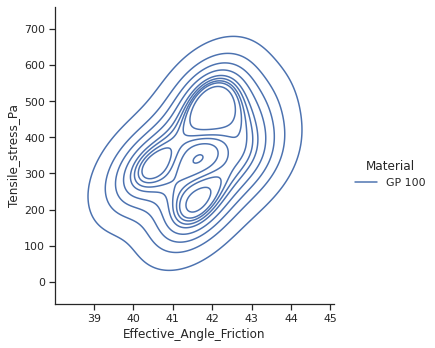

In [ ]:
sns.displot(data=Dataset[:8], x='Effective_Angle_Friction', hue="Material",),
sns.displot(data=Dataset[:8], x='Effective_Angle_Friction', y='Tensile_stress_Pa', kind="kde", hue='Material' )

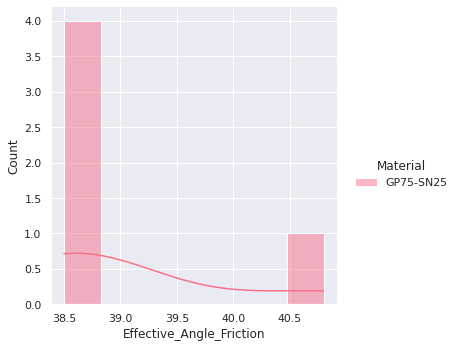

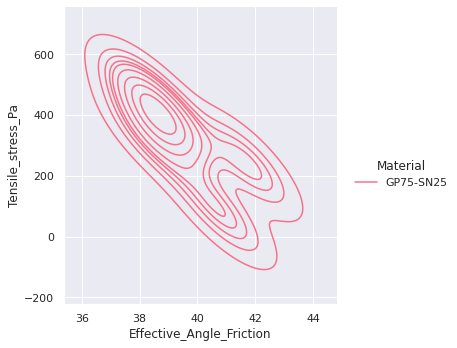

In [ ]:
sns.displot(data=Dataset[9:14], x='Effective_Angle_Friction', kde=True, hue="Material")
sns.displot(data=Dataset[8:14], x='Effective_Angle_Friction', y='Tensile_stress_Pa', kind="kde", hue="Material")

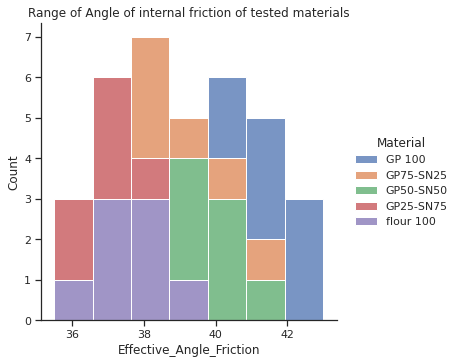

In [ ]:
sns.displot(data=Dataset, x='Effective_Angle_Friction', multiple="stack", hue="Material" )
plt.title("Range of Angle of internal friction of tested materials");

In [ ]:
col

Index(['Material', 'Normal_stress_Pa', 'Shear_stress_Pa', 'Tensile_stress_Pa',
       'Cohesion_Pa', 'UCS_Pa', 'Sigma1_Pa', 'Sigma2_Pa',
       'Effective_Angle_Friction', 'React_Angle_Friction', 'Density_g/cm³',
       'Flowability'],
      dtype='object')

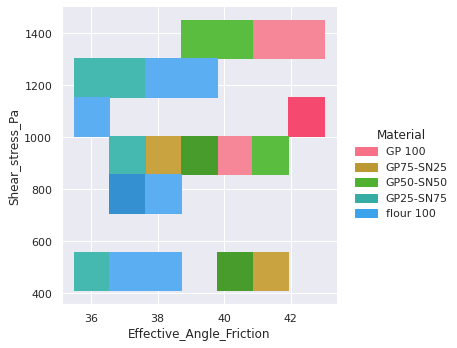

In [ ]:
sns.displot(data=Dataset, x='Effective_Angle_Friction', y='Shear_stress_Pa' , hue="Material" )

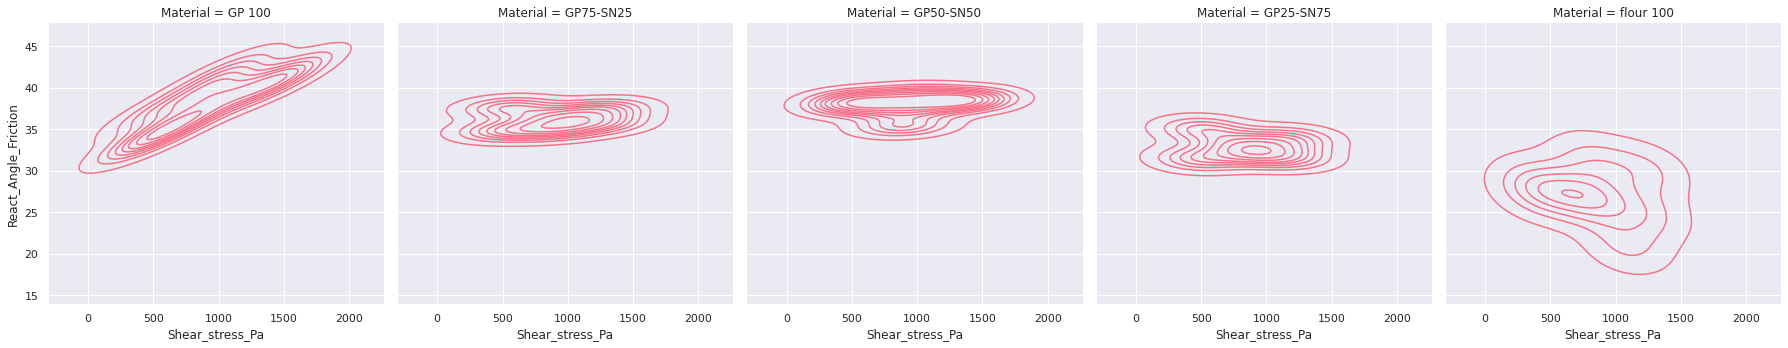

In [ ]:
sns.displot(data=Dataset, x='Shear_stress_Pa',y='React_Angle_Friction', col="Material", kind= "kde")

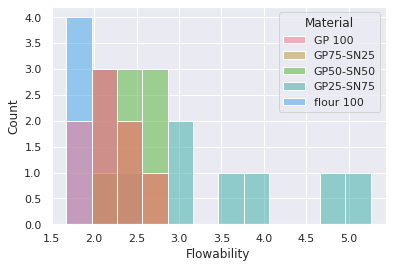

In [ ]:
sns.histplot(data=Dataset, x ='Flowability', hue="Material")

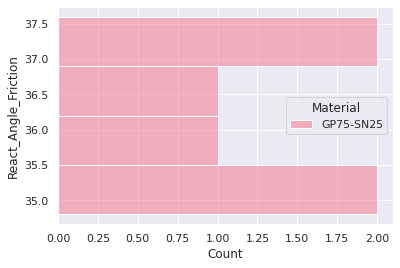

In [ ]:
sns.histplot(data=Dataset[8:14], y ='React_Angle_Friction', hue="Material")

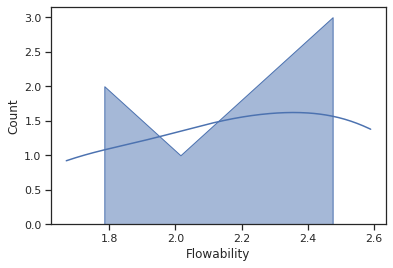

In [ ]:
sns.histplot(data=Dataset[:8], x="Flowability", kde =True, element="poly")

In [ ]:
col

Index(['Material', 'Normal_stress_Pa', 'Shear_stress_Pa', 'Tensile_stress_Pa',
       'Cohesion_Pa', 'UCS_Pa', 'Sigma1_Pa', 'Sigma2_Pa',
       'Effective_Angle_Friction', 'React_Angle_Friction', 'Density_g/cm³',
       'Flowability'],
      dtype='object')

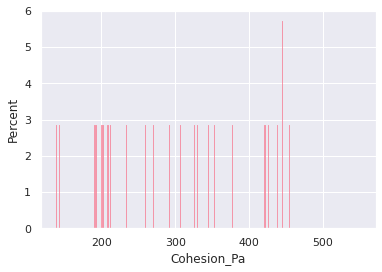

In [ ]:
sns.histplot(data=Dataset, x='Cohesion_Pa', stat="percent", discrete=True)

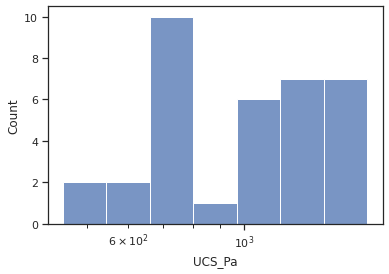

In [ ]:
sns.histplot(data=Dataset, x='UCS_Pa', log_scale=True)

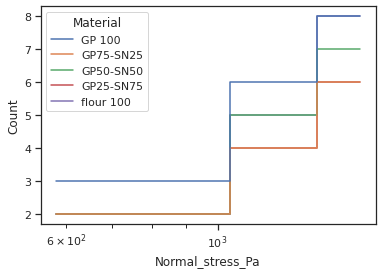

In [ ]:
sns.histplot(data=Dataset, x='Normal_stress_Pa', log_scale=True, hue="Material",
             cumulative =True, element="step", fill=False, common_norm=False,)

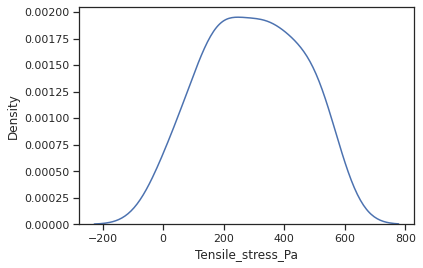

In [ ]:
sns.kdeplot(data=Dataset, x = 'Tensile_stress_Pa')

In [ ]:
col

Index(['Material', 'Normal_stress_Pa', 'Shear_stress_Pa', 'Tensile_stress_Pa',
       'Cohesion_Pa', 'UCS_Pa', 'Sigma1_Pa', 'Sigma2_Pa',
       'Effective_Angle_Friction', 'React_Angle_Friction', 'Density_g/cm³',
       'Flowability', 'Texture'],
      dtype='object')

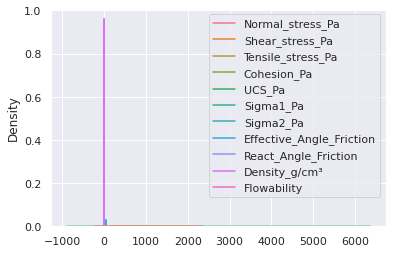

In [ ]:
sns.kdeplot(data=Dataset[:8])

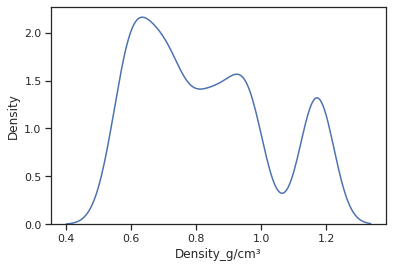

In [ ]:
sns.kdeplot(data=Dataset,x='Density_g/cm³', bw_adjust= .5 )

In [ ]:
col=Dataset.columns
col

Index(['Material', 'Normal_stress_Pa', 'Shear_stress_Pa', 'Tensile_stress_Pa',
       'Cohesion_Pa', 'UCS_Pa', 'Sigma1_Pa', 'Sigma2_Pa',
       'Effective_Angle_Friction', 'React_Angle_Friction', 'Density_g/cm³',
       'Flowability'],
      dtype='object')

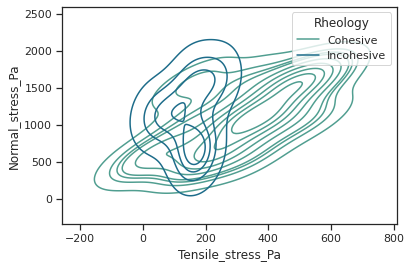

In [ ]:
sns.kdeplot(data=Dataset, x='Tensile_stress_Pa', hue='Rheology' , y= 'Normal_stress_Pa', palette='crest',)

In [ ]:
sns.kdeplot(data=Dataset, x ='Density_g/cm³', hue="Texture", multiple="stack" )

ValueError: ignored

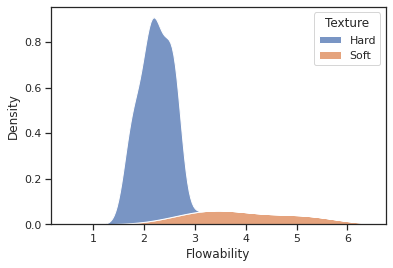

In [ ]:
sns.kdeplot(data=Dataset, x ='Flowability', hue="Texture", multiple="stack" )

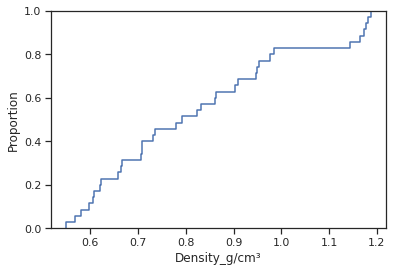

In [ ]:
sns.ecdfplot(data=Dataset, x = 'Density_g/cm³')

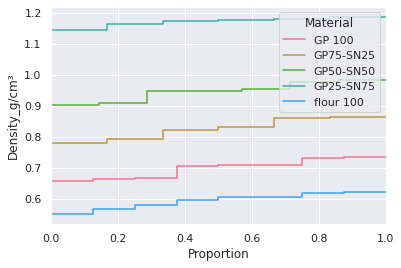

In [ ]:
sns.ecdfplot(data=Dataset, y = 'Density_g/cm³', hue='Material')

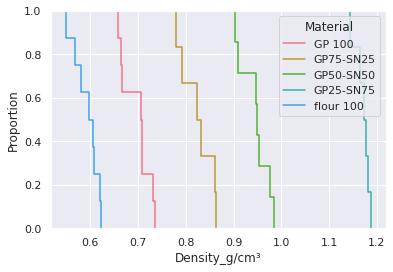

In [ ]:
sns.ecdfplot(data=Dataset, x = 'Density_g/cm³', hue='Material', complementary=True)

In [ ]:
col

Index(['Material', 'Normal_stress_Pa', 'Shear_stress_Pa', 'Tensile_stress_Pa',
       'Cohesion_Pa', 'UCS_Pa', 'Sigma1_Pa', 'Sigma2_Pa',
       'Effective_Angle_Friction', 'React_Angle_Friction', 'Density_g/cm³',
       'Flowability'],
      dtype='object')

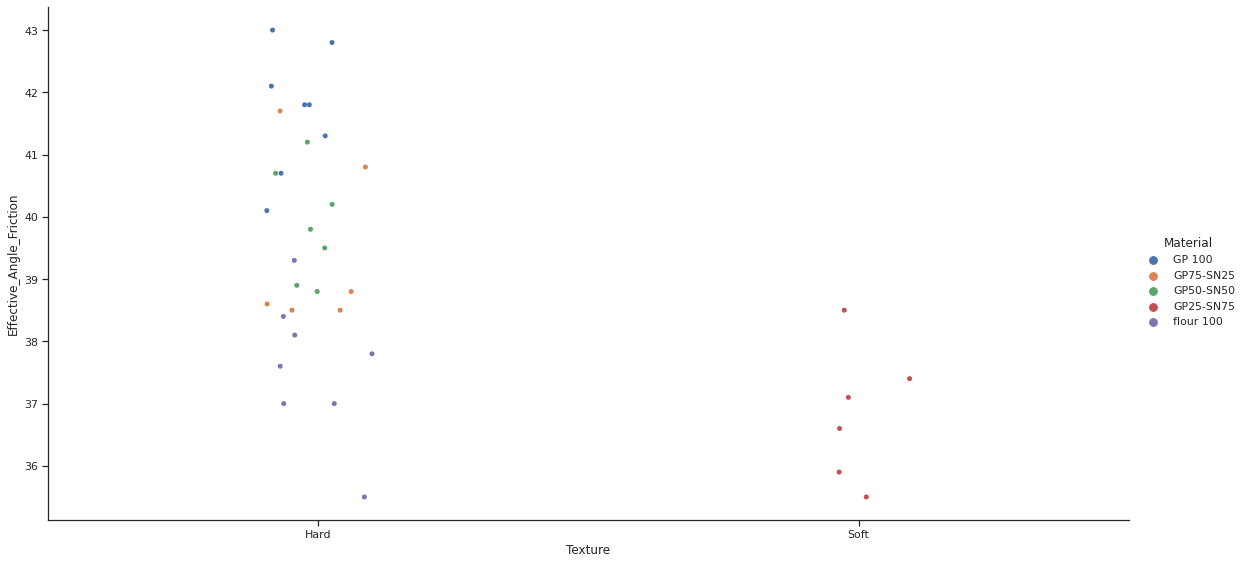

In [ ]:
sns.catplot(x='Texture',y ='Effective_Angle_Friction', 
            hue='Material', data=Dataset, aspect=2, height=8)

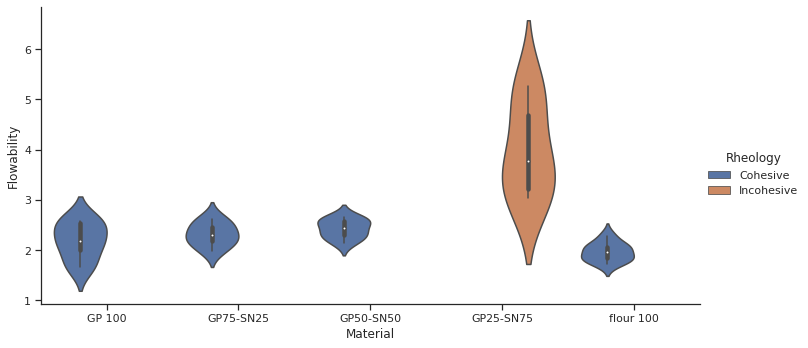

In [ ]:
sns.catplot(x="Material", y='Flowability', hue="Rheology", data=Dataset,
        kind="violin", aspect= 2);

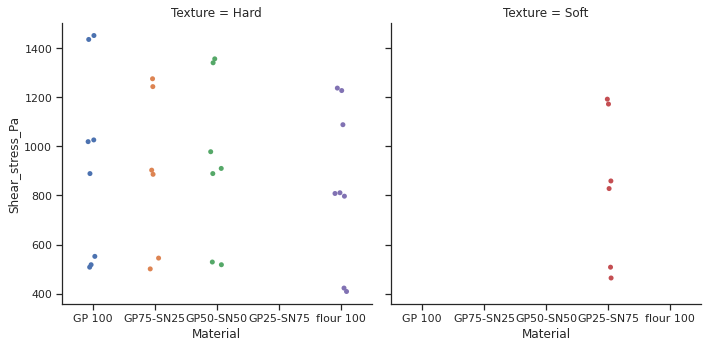

In [ ]:
sns.catplot(x="Material", y='Shear_stress_Pa', col="Texture", hue="Material",
            data=Dataset)

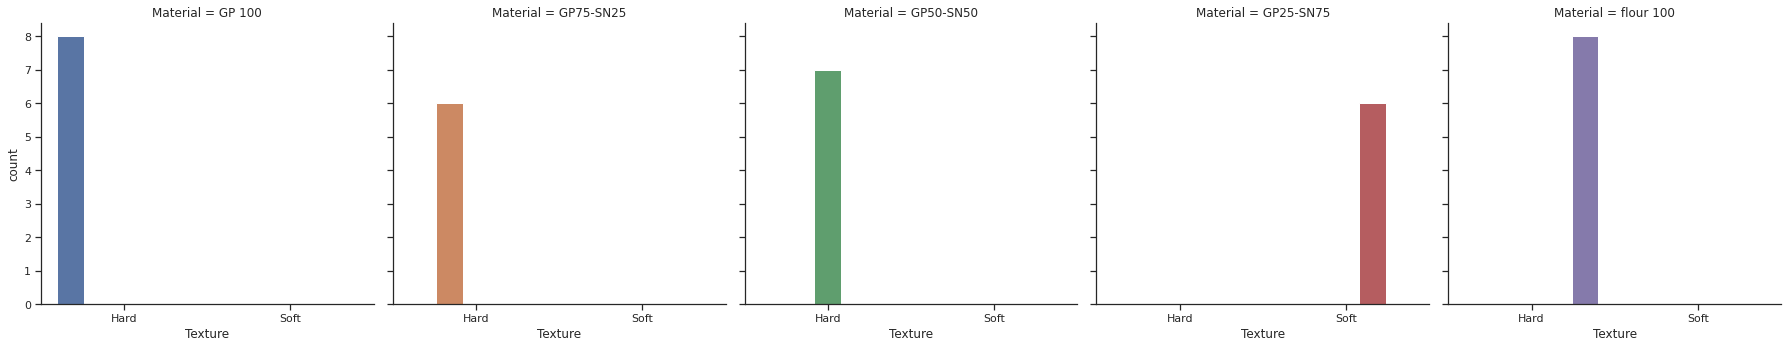

In [ ]:
sns.catplot(x= "Texture", data=Dataset,hue="Material",
            col_wrap=5, kind="count", col="Material")

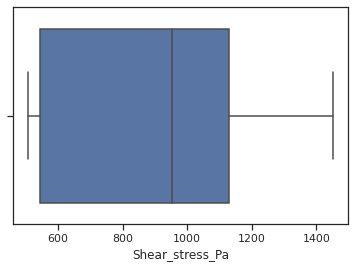

In [ ]:
sns.boxplot(x =Dataset[:8]["Shear_stress_Pa"])

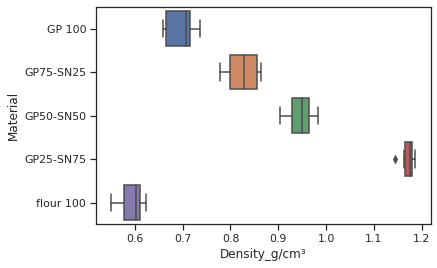

In [ ]:
sns.boxplot(x='Density_g/cm³',
            y='Material',
            data = Dataset)

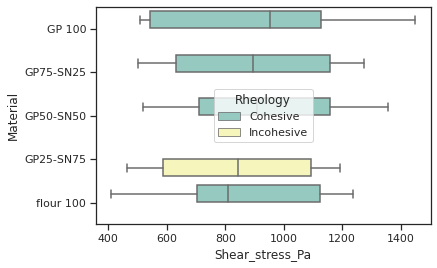

In [ ]:
sns.boxplot(x='Shear_stress_Pa',
            y='Material',
            data = Dataset, 
            hue= "Rheology",
            palette= "Set3")

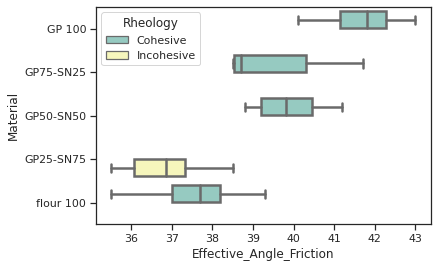

In [ ]:
sns.boxplot(x='Effective_Angle_Friction',
            y='Material',
            data = Dataset, 
            hue= "Rheology",
            palette= "Set3",
            linewidth=2.5)

In [ ]:
jk= Dataset.drop("Material", axis=0)

KeyError: ignored

SyntaxError: ignored

# Feature Engineering

In [ ]:
# Create a column on the Dataset that qualifies material rheology based on Flowability and cohesion
import numpy as np

Dataset["Rheology"] = np.where(Dataset['Flowability'] < 3.0, "Cohesive", "Incohesive")


# The slip tendency (T,) of a surface is defined as the ratio of shear stress to normal stress on that surface:
Dataset["Slip_Tendency"] = Dataset["Shear_stress_Pa"] / Dataset["Normal_stress_Pa"]

Dataset.sample(7)


,Material,Normal_stress_Pa,Shear_stress_Pa,Tensile_stress_Pa,Cohesion_Pa,UCS_Pa,Sigma1_Pa,Sigma2_Pa,Effective_Angle_Friction,React_Angle_Friction,Density_g/cm³,Flowability,Rheology,Slip_Tendency
3,GP 100,1077,889,290,378,1212,2531,512,40.1,37.1,0.707,2.09,Cohesive,0.825441
20,GP50-SN50,1598,1340,518,438,1483,3827,819,39.5,38.2,0.976,2.58,Cohesive,0.838548
16,GP50-SN50,1106,889,347,345,1109,2533,552,38.8,35.4,0.949,2.28,Cohesive,0.803797
10,GP75-SN25,1092,903,403,326,1054,2501,554,38.6,36.4,0.823,2.37,Cohesive,0.826923
1,GP 100,586,508,191,271,815,1361,243,41.3,34.2,0.666,1.67,Cohesive,0.866894
8,GP75-SN25,597,545,240,203,689,1501,283,41.7,37.6,0.779,2.18,Cohesive,0.912898
9,GP75-SN25,599,501,81,224,718,1428,277,40.8,34.8,0.792,1.99,Cohesive,0.836394


In [ ]:
Shuff =Dataset.sample(frac=1)

In [ ]:
len(col)

12

In [ ]:
# Create independent variables and target column for training . 
X = Shuff.drop(['Material',"Rheology"], axis = 1)
Y = Shuff["Rheology"]

In [ ]:
# split dataset 
from sklearn.model_selection import train_test_split

x_tr, x_t, y_tr, y_t = train_test_split(X,Y,
                                        test_size=0.3, )

In [ ]:
x_tr.shape,x_t.shape,y_tr.shape,y_t.shape

((24, 12), (11, 12), (24,), (11,))

## Modelling


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [ ]:
Model = RFC()

In [ ]:
Model.fit(x_tr,y_tr)

RandomForestClassifier()

In [ ]:
y_pred = Model.predict(x_t)

## Evaluation

In [ ]:
Model.score(x_tr, y_tr)

1.0

In [ ]:
Model.score(x_t, y_t)

1.0